<font color=red size=6>**Gráfica de Espectros**
    
<font color=red size=5>**Enrique Mejía Ospino**
    
<font color=red size=5>**Química Cuántica Avanzada**
    
<font color=red size=5>**Universidad Industrial de Santander**

In [1]:
from matplotlib import pylab as plt
import numpy as np
import pickle
import pandas as pd

In [2]:
def GaussBroad(X,Y,xmin,xmax,Npts,FWHM=1.5,FWHM2=1.5):
    """
    Function to broad a stick spectrum
    """
    XVals = np.array([X])[np.where(np.array([X])<=xmax)]
    YVals = np.array([Y])[np.where(np.array([X])<=xmax)]

    Xgrid = np.linspace(xmin,xmax,Npts)
    Ygrid = np.zeros(len(Xgrid))

    m =(FWHM2-FWHM)/(xmax-xmin)
    n =FWHM-m*xmin

    for i,j in zip(XVals,YVals):
        sigma = (m*i+n)/(2*np.sqrt(2*np.log(2)))
        tmpY  = 1/(np.sqrt(2*np.pi)*np.float(sigma))*np.exp(-(Xgrid-np.float(i))**2/(2*np.float(sigma)**2))
        if np.max(tmpY)>0:
            tmpY /=np.max(tmpY)
            tmpY *= j
            Ygrid += tmpY

    return Xgrid,Ygrid

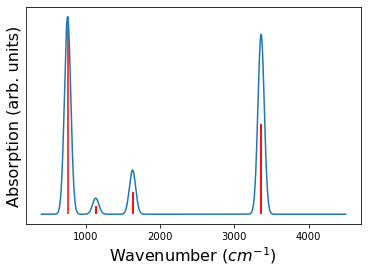

In [7]:
#spec = pickle.load(open("WATER_b.spectrum","rb"))
#Ints = spec["En"]*27.211385*(spec["Dx"]**2+spec["Dy"]**2+spec["Dz"]**2)
#X,Y  = GaussBroad(spec["En"]*27.211385,Ints,535,550,1000,0.8,0.8)
esp= np.loadtxt('./Data/mol1.csv', skiprows=1, usecols=(1, 2), delimiter=',')
no = esp[:, 0]
Int = esp[:, 1]

X,Y  = GaussBroad(no,Int,400,4500,2000,100,100)
scale = 1/np.max(Y)

plt.plot(X,Y*scale)
plt.vlines(no,0,Int*scale, color='red')
plt.yticks([])
plt.ylabel("Absorption (arb. units)",fontsize=16)
plt.xlabel("Wavenumber ($cm^{-1}$) ",fontsize=16)
#plt.xlim((535,550))
#plt.ylim((0,1.2))
plt.show()

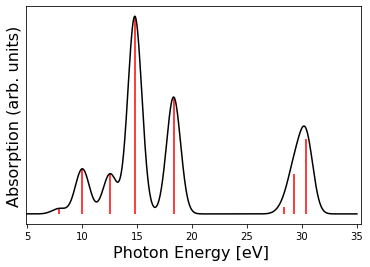

In [4]:
esp= np.loadtxt('./Data/esp_uv-vis1.csv', skiprows=1, usecols=(1, 2), delimiter=',')
no = esp[:, 0]
Int = esp[:, 1]

X,Y  = GaussBroad(no,Int,1.5,35,1000,1.5,1.5)
scale = 1/np.max(Y)

plt.plot(X,Y*scale, 'k')
plt.vlines(no,0,Int*scale, color='red')
plt.yticks([])
plt.ylabel("Absorption (arb. units)",fontsize=16)
plt.xlabel("Photon Energy [eV] ",fontsize=16)
plt.xlim((np.min(no)-3, np.max(no)+5))
#plt.ylim((0,1.2))
plt.show()

In [5]:
pd.DataFrame(esp, columns=['cm-1', 'Int (D)'])

,cm-1,Int (D)
0,7.906699,1.129689e-02
1,10.014881,9.427359e-02
2,10.087463,9.147131e-27
3,12.533947,8.334956e-02
4,14.791819,4.130328e-01
5,18.320404,2.442812e-01
6,27.999905,6.185764e-30
7,28.400560,1.447519e-02
8,29.317882,8.269818e-02
9,30.373688,1.574047e-01
